# Hyperlink Model

## Data Pre-Processing

In [1]:
import pandas as pd
import logging
import threading
import concurrent.futures
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC

In [2]:
import re

In [3]:
raw_data = pd.read_csv('phish_score (1).csv')
raw_data.head()

,Date_Time,Score,URL,IP
0,2023-02-11 13:52:45,3.5,http://www.to-saission.tpnqdp.cn/web/login.jsp,143.92.50.19
1,2023-02-11 13:52:40,2.1,https://yredt.susome.top/,2606:4700:3031::ac43:9924
2,2023-02-11 13:52:25,2.7,https://www.seedify-finance.com/,2606:4700:3037::6815:bed
3,2023-02-11 13:52:23,3.7,https://www.sassoin-cards.tuhqvv.cn/web/login.jsp,43.243.111.7
4,2023-02-11 13:52:17,5.6,https://www.momeykite.drsba.com/sonn/client/in...,23.247.42.26


In [4]:
copy_raw_data = raw_data
copy_raw_data.head()

,Date_Time,Score,URL,IP
0,2023-02-11 13:52:45,3.5,http://www.to-saission.tpnqdp.cn/web/login.jsp,143.92.50.19
1,2023-02-11 13:52:40,2.1,https://yredt.susome.top/,2606:4700:3031::ac43:9924
2,2023-02-11 13:52:25,2.7,https://www.seedify-finance.com/,2606:4700:3037::6815:bed
3,2023-02-11 13:52:23,3.7,https://www.sassoin-cards.tuhqvv.cn/web/login.jsp,43.243.111.7
4,2023-02-11 13:52:17,5.6,https://www.momeykite.drsba.com/sonn/client/in...,23.247.42.26


In [5]:
copy_raw_data.shape

(37542, 4)

In [6]:
def url_len(row):
    return len(str(row['URL']))

copy_raw_data['Length'] = copy_raw_data.apply(lambda row: url_len(row),axis=1)
copy_raw_data.head()

,Date_Time,Score,URL,IP,Length
0,2023-02-11 13:52:45,3.5,http://www.to-saission.tpnqdp.cn/web/login.jsp,143.92.50.19,46
1,2023-02-11 13:52:40,2.1,https://yredt.susome.top/,2606:4700:3031::ac43:9924,25
2,2023-02-11 13:52:25,2.7,https://www.seedify-finance.com/,2606:4700:3037::6815:bed,32
3,2023-02-11 13:52:23,3.7,https://www.sassoin-cards.tuhqvv.cn/web/login.jsp,43.243.111.7,49
4,2023-02-11 13:52:17,5.6,https://www.momeykite.drsba.com/sonn/client/in...,23.247.42.26,57


In [7]:
def url_digits(row):
    digits = re.findall('\d',row['URL'])
    return len(digits)
copy_raw_data['digits'] = copy_raw_data.apply(lambda row: url_digits(row),axis=1)
copy_raw_data.head()

,Date_Time,Score,URL,IP,Length,digits
0,2023-02-11 13:52:45,3.5,http://www.to-saission.tpnqdp.cn/web/login.jsp,143.92.50.19,46,0
1,2023-02-11 13:52:40,2.1,https://yredt.susome.top/,2606:4700:3031::ac43:9924,25,0
2,2023-02-11 13:52:25,2.7,https://www.seedify-finance.com/,2606:4700:3037::6815:bed,32,0
3,2023-02-11 13:52:23,3.7,https://www.sassoin-cards.tuhqvv.cn/web/login.jsp,43.243.111.7,49,0
4,2023-02-11 13:52:17,5.6,https://www.momeykite.drsba.com/sonn/client/in...,23.247.42.26,57,0


In [8]:
copy_raw_data['digit_ratio'] = copy_raw_data['digits'] / copy_raw_data['Length']
copy_raw_data.head()

,Date_Time,Score,URL,IP,Length,digits,digit_ratio
0,2023-02-11 13:52:45,3.5,http://www.to-saission.tpnqdp.cn/web/login.jsp,143.92.50.19,46,0,0.0
1,2023-02-11 13:52:40,2.1,https://yredt.susome.top/,2606:4700:3031::ac43:9924,25,0,0.0
2,2023-02-11 13:52:25,2.7,https://www.seedify-finance.com/,2606:4700:3037::6815:bed,32,0,0.0
3,2023-02-11 13:52:23,3.7,https://www.sassoin-cards.tuhqvv.cn/web/login.jsp,43.243.111.7,49,0,0.0
4,2023-02-11 13:52:17,5.6,https://www.momeykite.drsba.com/sonn/client/in...,23.247.42.26,57,0,0.0


In [9]:
import urllib.request
from bs4 import BeautifulSoup, SoupStrainer
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
copy_raw_data.drop(6336, inplace=True)

In [10]:
copy_raw_data.to_csv('pre_thread_db.csv')

In [11]:
def get_links(row):
    try:
        url2 = urllib.request.urlopen(str(row['URL']),timeout=15)
        print("Webpage opened")
    except:
        print('Webpage not responding')

        return None
    try:
        soup = BeautifulSoup(url2, 'lxml')
    except:
        print('Cant soup this')
        return None
    links = []
    link_len = 0
    if soup.find('a', {"href":"https://my.virginmedia.com/my-apps/onlinesecurity/websafe/settings"}):
        print("Blocked by virgin (fuck virgin fr)")
        return None
    for link in soup.findAll('a',href=True,limit=25):
        if link.get('href') == '#':
            continue
        links.append(link.get('href'))
        print('Link # ', link)
    print("Link Length: " ,len(links))
    link_len = int(len(links))
    return link_len

In [12]:
def get_sus_words(row):
    try:
        url2 = urllib.request.urlopen(str(row['URL']),timeout=15)
        print("Webpage opened")
    except:
        print('Webpage not responding')

        return None
    try:
        soup = BeautifulSoup(url2, 'lxml')
    except:
        print('Cant soup this')
        return None
    links = []
    link_len = 0
    if soup.find('a', {"href":"https://my.virginmedia.com/my-apps/onlinesecurity/websafe/settings"}):
        print("Blocked by isp")
        return None
    for link in soup.findAll('p',string=re.compile(r'(security|login|signin|bank|account|update|include|webs|online)'),limit=150):
        links.append(link)
        print('Sus Word in <P> element # ', link)
    print("Sus Word Amount: " ,len(links))
    link_len = int(len(links))
    return link_len

In [13]:
def get_hyphens(row):
    hyphens = re.findall('-',row['URL'])
    return len(hyphens)

In [14]:
df_hyper = copy_raw_data[15000:20000]
df_hyper.shape

(5000, 7)

In [15]:
def hyperlink_df_transform():
        hyperlinks = []
        for index, row in df_hyper.iterrows():
                print("Transforming row: ", index)
                hyp_len = get_links(row)
                hyperlinks.append(hyp_len)
        return hyperlinks

Transforming row:  15001
Webpage not responding
Transforming row:  15002
Webpage not responding
Transforming row:  15003
Webpage not responding
Transforming row:  15004
Webpage opened
Link #  <a class="text-arrow-icon" href="/">
<i class="ms-0 me-1" data-feather="arrow-left"></i>
                                    Return to Home
                                </a>
Link #  <a href="https://wapka.org" rel="nofollow">Wapka.org</a>
Link Length:  2
Transforming row:  15005
Webpage opened
Link Length:  0
Transforming row:  15006
Webpage not responding
Transforming row:  15007
Webpage not responding
Transforming row:  15008
Webpage not responding
Transforming row:  15009
Webpage not responding
Transforming row:  15010
Webpage not responding
Transforming row:  15011
Webpage opened
Link #  <a class="css-1kxeny6" href="/"><style data-emotion="css 1re1q5z">.css-1re1q5z{width:auto;height:2rem;margin-right:0.5rem;}@media (min-width: 1000px){.css-1re1q5z{height:3rem;margin-right:1rem;}}</style><sv
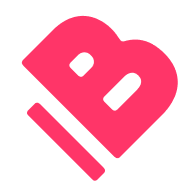
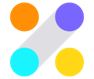
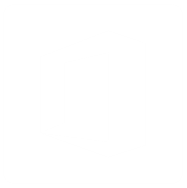
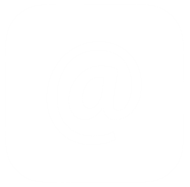

In [16]:
hyperlink_array = hyperlink_df_transform()
#df_hyper.to_csv('post_hyperlink_df.csv')


In [17]:
df_hyper['Hyperlinks'] = hyperlink_array
df_hyper.tail()

f:\applications\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date_Time,Score,URL,IP,Length,digits,digit_ratio,Hyperlinks
19996,2023-01-25 21:24:18,3.0,https://oabencoado2023panela.com/589458/422210...,54.174.244.64,70,22,0.314286,NaN
19997,2023-01-25 21:24:17,2.2,https://oabencoado2023panela.com/589458/158792...,54.174.244.64,70,22,0.314286,NaN
19998,2023-01-25 21:24:15,4.7,https://nolabelsapparel.com/,170.187.204.87,28,0,0.000000,NaN
19999,2023-01-25 21:24:14,4.1,https://new-order.me/td3vjz,2606:4700:3037::ac43:ace2,27,1,0.037037,NaN
20000,2023-01-25 21:24:12,2.5,https://new-order.me/lbltum,172.67.172.226,27,0,0.000000,NaN


In [18]:
#df_hyper_clean = pd.read_csv('df_hyperlinks_clean.csv')

In [19]:
df_hyper_clean = df_hyper.dropna()
df_hyper_clean.shape

(1182, 8)

In [20]:
df_hyper_clean.to_csv('df_hyperlinks_clean_2_2.csv')

In [ ]:
df_hyper_clean

In [21]:
def sus_df_transform():
        sus = []
        for index, row in df_hyper_clean.iterrows():
                print("Transforming row: ", index)
                sus_len = get_sus_words(row)
                sus.append(sus_len)
        return sus

In [22]:
#df_hyper_clean.drop(383,inplace=True)

In [23]:
sus_word_len_array = sus_df_transform()
len(sus_word_len_array)

Transforming row:  15004
Webpage opened
Sus Word Amount:  0
Transforming row:  15005
Webpage opened
Sus Word Amount:  0
Transforming row:  15011
Webpage opened
Sus Word in <P> element #  <p class="css-gwtz24 e1vdercr1">Create your online form!</p>
Sus Word Amount:  1
Transforming row:  15029
Webpage opened
Sus Word Amount:  0
Transforming row:  15030
Webpage opened
Sus Word Amount:  0
Transforming row:  15040
Webpage opened
Sus Word Amount:  0
Transforming row:  15045
Webpage opened
Sus Word Amount:  0
Transforming row:  15052
Webpage opened
Sus Word Amount:  0
Transforming row:  15053
Webpage opened
Sus Word Amount:  0
Transforming row:  15062
Webpage opened
Sus Word Amount:  0
Transforming row:  15064
Webpage opened
Sus Word Amount:  0
Transforming row:  15078
Webpage opened
Sus Word Amount:  0
Transforming row:  15082
Webpage opened
Sus Word Amount:  0
Transforming row:  15083
Webpage opened
Sus Word Amount:  0
Transforming row:  15087
Webpage opened
Sus Word Amount:  0
Transforming

1182

In [24]:
df_hyper_clean['Sus_Words'] = sus_word_len_array
df_sus_clean = df_hyper_clean.dropna()
df_sus_clean.shape

f:\applications\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(1175, 9)

In [25]:
df_sus_clean.to_csv('df_sus_words_clean_2_2.csv')